# Imports

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Daten vorbereiten

In [2]:
df = pd.read_csv('../../Datensaetze/news_POS_POS_tags_nouns_adjectives_verb.csv')

In [3]:
df.head(2)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415.0,244.0,quarterli profit at US media giant timewarn j...,"['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...",high fourth own fourth underlying exceptional ...,74.0,22.0,1.0
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379.0,230.0,the dollar ha hit it highest level against th...,"['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...",late recent sanguine current current next shar...,66.0,30.0,9.0


In [5]:
#data1 = df[df['Genre1'] == 'Jazz']
#data2 = df[df['Genre1'] == 'Hip Hop']
#data3 = df[df['Genre1'] == 'Electronic']
#data4 = df[df['Genre1'] == 'Folk, World, & Country']
#genres = pd.concat([data1, data2,data3, data4], axis = 0)
#genres.head(2)

In [6]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(df.content)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

# DB-Scan mit allen Kategorien 

In [7]:
def dbscan(eps, min_points, metric, array): 
    clustering = DBSCAN(eps=eps, min_samples=min_points, metric=metric)
    clusters = clustering.fit(array)
    labels = clusters.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    return 'n_clusters_', n_clusters_, 'n_noise_', n_noise_

## Test von verschiedenen Parametern

In [8]:
eps = [0.05, 0.1, 0.5, 0.9, 1, 1.5]
min_points = [10, 20, 30, 100]
for e in eps:
    for m in min_points:
        print('e: ',e, 'm:',m ,dbscan(e, m, 'cosine', tf_idf_array))

e:  0.05 m: 10 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.05 m: 20 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.05 m: 30 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.05 m: 100 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.1 m: 10 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.1 m: 20 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.1 m: 30 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.1 m: 100 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.5 m: 10 ('n_clusters_', 5, 'n_noise_', 2159)
e:  0.5 m: 20 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.5 m: 30 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.5 m: 100 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.9 m: 10 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 20 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 30 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 100 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 10 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 20 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 30 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 100 ('n_clusters_', 1, 'n_noise_', 0)
e: 

## Visualisieren

Text(0, 0.5, 'Feature 1')

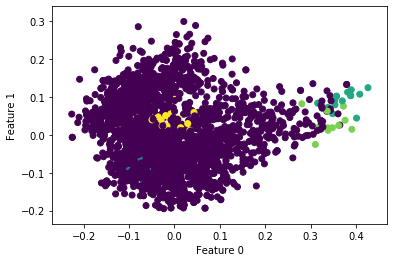

In [17]:
#bestes Ergebnis anwenden: eps=0.5, min_samples=20

importring = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
clusters = clustering.fit(tf_idf_array)
labels = clusters.labels_

sklearn_pca = PCA(n_components = 2)
data = sklearn_pca.fit_transform(tf_idf_array)

plt.scatter(data[:, 0], data[:, 1], c=clusters.labels_, cmap="viridis")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#plt.savefig('dbscan_viergenres')

# DB-Scan mit Sport + Tech

In [27]:
data1 = df[df['category'] == 'sport']
data2 = df[df['category'] == 'tech']

cats = pd.concat([data1, data2], axis = 0)
cats.head(2)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
1313,sport,001.txt,Claxton hunting first major medal,British hurdler Sarah Claxton is confident sh...,206.0,145.0,british hurdler sarah claxton is confid she c...,"['_SP', 'JJ', 'NN', 'NNP', 'NNP', 'VBZ', 'JJ',...",British confident first major next old British...,29.0,22.0,5.0
1314,sport,002.txt,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she would...,139.0,103.0,sonia o'sullivan ha indic that she would like...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'IN', 'PRP...",next old official Provincial last present firs...,16.0,9.0,2.0


In [29]:
#cats.category

In [30]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(cats.content)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [31]:
def dbscan(eps, min_points, metric, array): 
    clustering = DBSCAN(eps=eps, min_samples=min_points, metric=metric)
    clusters = clustering.fit(array)
    labels = clusters.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    return 'n_clusters_', n_clusters_, 'n_noise_', n_noise_

In [32]:
eps = [0.05, 0.1, 0.5, 0.9, 1, 1.5]
min_points = [10, 20, 30, 100]
for e in eps:
    for m in min_points:
        print('e: ',e, 'm:',m ,dbscan(e, m, 'cosine', tf_idf_array))

e:  0.05 m: 10 ('n_clusters_', 0, 'n_noise_', 912)
e:  0.05 m: 20 ('n_clusters_', 0, 'n_noise_', 912)
e:  0.05 m: 30 ('n_clusters_', 0, 'n_noise_', 912)
e:  0.05 m: 100 ('n_clusters_', 0, 'n_noise_', 912)
e:  0.1 m: 10 ('n_clusters_', 0, 'n_noise_', 912)
e:  0.1 m: 20 ('n_clusters_', 0, 'n_noise_', 912)
e:  0.1 m: 30 ('n_clusters_', 0, 'n_noise_', 912)
e:  0.1 m: 100 ('n_clusters_', 0, 'n_noise_', 912)
e:  0.5 m: 10 ('n_clusters_', 1, 'n_noise_', 898)
e:  0.5 m: 20 ('n_clusters_', 0, 'n_noise_', 912)
e:  0.5 m: 30 ('n_clusters_', 0, 'n_noise_', 912)
e:  0.5 m: 100 ('n_clusters_', 0, 'n_noise_', 912)
e:  0.9 m: 10 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 20 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 30 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 100 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 10 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 20 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 30 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 100 ('n_clusters_', 1, 'n_noise_', 0)
e:  1.5 m: 10 (